In [125]:
#Import Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib
from textblob import TextBlob


# Install new libraries
#%pip install pyspellchecker
#%pip install TextBlob

In [126]:
vodafone_reviews = pd.read_csv('vodafone_reviews.csv')  

In [127]:
##############################################################
########## Data Cleansing and Normalization pipeline ######### 

In [128]:
# Set everything to lower case

vodafone_reviews['review'] = vodafone_reviews['review'].str.lower()
vodafone_reviews['title'] = vodafone_reviews['title'].str.lower()

{'infurtiating', '10mb', 'datpak', 'exellent', 'vodaphone', 'pocketwifi', 'fremental', 'bulshit', 'vodaphony', '&amp', 'expesnsive', 'armadale', 'coustmer', 'whatdafail', 'vodadfone', 'riiiiiipppp', 'exremely', 'covid', 'voda', '11pm', 'erros', 'westfield', 'zagg', 'unethial', 'vodacrud', 'vodafonetechnical', 'brookside', 'appauling', 'avoidafone', '3k', 'unstatisified', "vodafone's", 'custormer', 'vodafoney', 'appaling', 'wouldnâ€™t', 'hopless', 'wose', 'vodaphones', 'canâ€™t', 'html', 'abismal', 'sumeet', '3g', 'dockland', 'watiting', 'thx', 'vodapone', 'mms', 'st', 's', 'yarra', 'cancle', 'telcos', 'cbd', 'hanset', 'expoit', 'unley', '4g', 'zetland', 'afrian', 'kb', 'donâ€™t', 'samsung', 'greensborough', 'recind', 'unsatesfaied', 'exspence', 'renegged', '2nd', 'metcentre', 'postpaid', 'broadmeadows', 'obudsman', 'untrust', 'vodaafone', 'w', 'l', 'redglobal', 'â€¦', 'pm', 'f+ã—ã·==king', 'parramatta', 'onya', 'campare', "telco's", 'doesnâ€™t', 'problam', 'vodafone', 'myvodafone', '1g

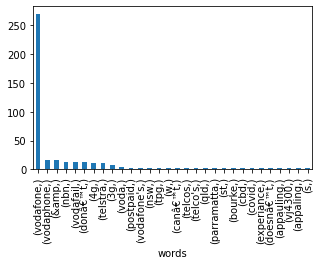

In [129]:
# Identify unknown words, coloquialisms and unusual punctuation
# Unknown words are identified using https://pypi.org/project/pyspellchecker/

# get list of words

def strip_punct(word):
    word =  re.sub("[-,\.;:\(\)\{\}\[\]!?\"\s\n\$%_\/]", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        words = strip_punct(df[column].iloc[i])
        words = words.split(" ")
        word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame

# Create dataframe containing list of words
word_frame = list_of_words(vodafone_reviews, "title")

# remove empty strings from list
word_frame = word_frame[word_frame['words']!=""]

# Initialise spellchecker

spell = SpellChecker()

unknown_words = spell.unknown(word_frame["words"].to_list())

unknown_word_counts = word_frame[word_frame['words'].isin(unknown_words)].value_counts()

unknown_word_counts.head(30).plot(kind='bar',figsize=(5,3))

print(unknown_words)


In [130]:
# Create spelling and punctuation correction dictionary

spelling_dict ={'unsatesfaied' : "unsatisfied", 
                'diputes' : "disputes", 
                'watiting' : "waiting",
                'avoidafone' : "vodafone", 
                'smss' : "sms", 
                'abismal' : "abysmal", 
                'wose' : "worse", 
                'renegged' :"reneged", 
                'exisiting' : "existing",  
                'postpaid' : "post paid", 
                'vodafonetechnical' : "vodafone technical", 
                'thx' : "thanks", 
                'unethial' : "unethical", 
                'vodafones' : "vodafone's", 
                'vodaphone' : "vodafone", 
                'custormer' : "customer", 
                "'ok'" : "ok", 
                'vodafoneâ€™s' : "vodafone's", 
                'whatdafail' : "vodafone", 
                'excellant' : "excellent",
                'vodacrud' : "vodafone", 
                'infurtiating' : "infuriating", 
                'wrost' : "worst", 
                'vodaphony' : "vodafone", 
                'exremely' : "extremely", 
                'definiton': "definition", 
                'erros' : "errors", 
                'disapppointment' : "disappointment", 
                'fraudulents' : "fraudulent", 
                'riiiiiipppp' : "rip",  
                'datpak' : "data pack", 
                'experiance' : "experience", 
                'vodafail' : "vodafone", 
                'unstatisified' : "unsatisfied", 
                'shockin' : "shocking", 
                'expesnsive' : "expensive", 
                'canâ€™t' : "can't", 
                '&amp' : "&", 
                'onya' : "good on you", 
                'liers' : "liars", 
                'discusting' : "discusting", 
                'itâ€™s' : "it's", 
                'pocketwifi' : "pocket wifi", 
                'hanset' : "handset", 
                'traped' : "trapped", 
                'untrust' : "untrustworthy", 
                'donâ€™t' : "doesn't", 
                'f+ã—ã·==king' : "fucking", 
                'problam' : "problem", 
                'vodafoney' : "vodafone", 
                '6year' : "6 year", 
                'repaire' : "repair", 
                'vodaphones' : "vodafone's", 
                "'vodaphone'" : "vodafone", 
                'cancle' : "cancel", 
                'bulshit': "bullshit", 
                'vodaafone' : "vodafone", 
                'expoit' : "exploit", 
                'wouldnâ€™t' : "wouldn't", 
                'appaling' : "appalling", 
                'netowrk' : "network",  
                'exellent' : "excellent", 
                'vodadfone' : "vodafone", 
                "vodaphone's" : "vodafone's", 
                't&amp' : " ", 
                'okhay' : "ok", 
                'appauling' : "appalling", 
                'doesnâ€™t' : "doesn't", 
                'voda ' : "vodafone ", 
                'techncial' : "technical", 
                'obudsman' : "ombudsman", 
                'redglobal' : "red global", 
                'vodafhone' : "vodafone", 
                'â€¦' : " ", 
                'coustmer' : "customer", 
                'apauling' : "appalling", 
                "telco's" : "telcos", 
                'exspence' : "expense", 
                'terribl' : "terrible", 
                'hopless' : "hopeless", 
                'vodapone' : "vodafone", 
                'recind' : "rescind"}

In [131]:
#  Replace misspelled and unusual words using custom dictionary

def replace_words(text, dictionary):
    for (word, replacement) in dictionary.items():
        text = text.replace(word, replacement)
    #print(text)
    return text

for i in range(len(vodafone_reviews)):
    vodafone_reviews['review'].loc[i] = replace_words(vodafone_reviews['review'].loc[i], spelling_dict)


C:\Users\matth\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [132]:
# Sentiment score each review
#############################################

nltk.download('vader_lexicon')

# Create a Sentiment Intensity Analyser object
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis for extracted sentences
sentiment = vodafone_reviews['review'].apply(lambda r: sid.polarity_scores(r))
sentiment = pd.DataFrame(list(sentiment))
# Combine sentiment scores with sentence corpus

# Check that the corpus of individuola sentences and
# Sentiment scores are the same length
print(len(vodafone_reviews))
print(len(sentiment))

# Concatenate the sentement scores with the sentences being analyised
vodafone_reviews_expanded =  pd.concat([vodafone_reviews,sentiment['compound']], axis=1)
vodafone_reviews_expanded

# Set scores and sentiments to numeric

vodafone_reviews_expanded[["score", "compound"]] = vodafone_reviews_expanded[["score", "compound"]].apply(pd.to_numeric)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1903
1903


<AxesSubplot:xlabel='compound', ylabel='score'>

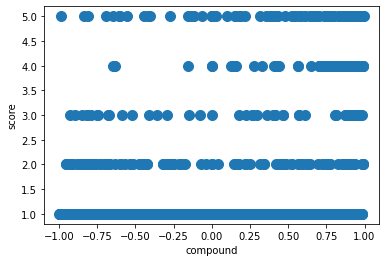

In [133]:
vodafone_reviews_expanded.plot.scatter(x='compound', y='score', s=100)

In [170]:
# Tokenise data to single sentences

nltk.download('punkt')


# Create a data frame to contain corpus of sentence
processed_columns = pd.DataFrame(columns=['sentences' , 'noun_phrases','lemmatised_sentences', 'ngrams'])

# Return sentences as a tuple containing the sentence and sentiment score

def sentence_sentiment_tuples(sentences, promoter_score):
    tuple_list = []
    for sentence in sentences:
        sentiment = sid.polarity_scores(sentence)["compound"]
        tuple_list = tuple_list + [(sentence, sentiment, promoter_score)]
    return tuple_list


# Iterate through expanded corpus, extracting sentenses and cleaning the text
for i in range(len(vodafone_reviews_expanded)):
    # Parse document into sentenses
    sentence_list = nltk.tokenize.sent_tokenize(vodafone_reviews_expanded.review[i])
    sentence_tuples = sentence_sentiment_tuples(sentence_list, vodafone_reviews_expanded.score[i])
    processed_columns = processed_columns.append(pd.DataFrame({"sentences" : [sentence_tuples]}))
    #print(sentence_list)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [171]:
print(processed_columns)

                                            sentences noun_phrases  \
0   [(my email and password were part of a company...          NaN   
0   [(misguided salecouple of days ago, i was told...          NaN   
0   [(worst network for data in australia., -0.624...          NaN   
0   [(they charged me for over a year a plan with ...          NaN   
0   [(my parents and i have been with vodafone for...          NaN   
..                                                ...          ...   
0   [(vodafone's extremely cheap, now i know why.,...          NaN   
0   [(i reduced my plan to$22 from $35 thinking it...          NaN   
0   [(please never ever make mistake of going with...          NaN   
0   [(i had to get my address changed (same as on ...          NaN   
0   [(i love this phone company been with them for...          NaN   

   lemmatised_sentences ngrams  
0                   NaN    NaN  
0                   NaN    NaN  
0                   NaN    NaN  
0                   NaN    

In [172]:
#### Extract Noun Phrases
nltk.download('brown')

#txt = """Natural language processing (NLP) is a field of computer science, artificial intelligence, and computational linguistics concerned with the interactions between computers and human (natural) languages."""
#blob = TextBlob(txt)
#print(blob.noun_phrases)

def extract_noun_phrase_list(sentence, sentiment, promoter_score):
    tuple_list = []
    blob = TextBlob(sentence)
    phrases = blob.noun_phrases
    for phrase in phrases:
        if len(phrase)>0:
            tuple_list = tuple_list + [(phrase, sentiment, promoter_score)]
            #print(phrase + "   " + str(len(phrase)))
    
    return tuple_list
        

for i in range(len(processed_columns)):
    np_list = []
    for sentence in processed_columns.sentences.iloc[i]:
        noun_phrases = extract_noun_phrase_list(sentence[0], sentence[1], sentence[2])
        if len(noun_phrases)>0:
            np_list = np_list + noun_phrases
    processed_columns.noun_phrases.iloc[i] = np_list

processed_columns.noun_phrases



[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


0    [(company database leak, -0.34, 1), (vodafone ...
0    [(+ trade-in value, 0.34, 1), (old phones, 0.3...
0    [(mobile phone, -0.7227, 1), (i need data, -0....
0    [(free phone, 0.3612, 1), (spare phone, 0.3612...
0    [(decent coverage, 0.0, 1), (cheap prices, 0.0...
                           ...                        
0    [(vodafone 's, 0.0, 2), (terriblee network rel...
0    [(n't use, -0.1396, 1), (mobile data, -0.1396,...
0    [(whole business, -0.6249, 1), (location ... l...
0    [(vodafone system, 0.0, 1), (pin code, 0.0, 1)...
0    [(phone company, 0.9337, 5), (tumultuos time, ...
Name: noun_phrases, Length: 1903, dtype: object

In [173]:
###### Lemmatise Sentenses


import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')


# Return a lemmatized version of a string
def lemmatize_string(text):
    # Return an empty string if a None object is received
    if text is None:
        return ""
    
    # Return empty string if a strng is not received
    if not  isinstance(text, str):
        return ""
    
    lemmatizer = WordNetLemmatizer()

    # tokenise the sentence and determine part of speech tagging
    # for each word
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))  
    
    # Convert the POS tagging from nltk.pos_tag
    # to the wordnet POS identifier recognised
    # by WordNetLemmatizer()
    words_tagged =[]
    for word in pos_tagged_text:
        if word[1].startswith('J'):
            word=(word[0], wordnet.ADJ)
        elif word[1].startswith('V'):
            word=(word[0], wordnet.VERB)
        elif word[1].startswith('N'):
            word=(word[0], wordnet.NOUN)
        elif word[1].startswith('R'):
            word=(word[0], wordnet.ADV)
        else:
            word=(word[0], None)
        words_tagged.append(word)
    
    # Lemmatize each word according to it's determined word class
    lemmatized = []
    for word, tag in words_tagged:
        if tag is None:
            lemmatized.append(word)
        else:        
            lemmatized.append(lemmatizer.lemmatize(word, tag))
    
    # reconstruct and returne lemmatized sentence
    seperator = ' '
    return seperator.join(lemmatized)

# remove everything that isn't text
# and remove 1 and 2 letter words
def scrub_text(text):
    # Remove numbers
    text =  re.sub('(?<=\s)\d+(?=\s)', '', text)
    # remove single and double character terms
    text = re.sub("(?<=\s)\w{1,2}(?=\s)", "", text)
    # remove non word characers except for spaces
    text =  re.sub('[^\w\s]',' ', text)
    # condence multple spaces
    text =  re.sub('\s+',' ', text)
    return(text)


for i in range(len(processed_columns)):
    cleaned_sentence_list = []
    for sentence in processed_columns.sentences.iloc[i]:
        lemmatised_sentence = lemmatize_string(sentence[0])
        scrubbed_lemmatised_sentence =scrub_text(lemmatised_sentence)
        if len(scrubbed_lemmatised_sentence)>0:
            cleaned_sentence_list = cleaned_sentence_list + [(scrubbed_lemmatised_sentence, sentence[1] , sentence[2])]
    processed_columns.lemmatised_sentences.iloc[i] = cleaned_sentence_list
    
processed_columns.lemmatised_sentences

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0    [(my email and password part company database ...
0    [(misguided salecouple day ago tell that will ...
0    [(bad network for data australia , -0.6249, 1)...
0    [(they charge for over year plan with insuranc...
0    [(my parent and have with vodafone for about y...
                           ...                        
0    [(vodafone s extremely cheap now know why , 0....
0    [(i reduce plan from think would cheap because...
0    [(please never ever make mistake with vodafone...
0    [(i have get address change same drive license...
0    [(i love this phone company with them for leas...
Name: lemmatised_sentences, Length: 1903, dtype: object

In [182]:
##### Create lists of N-Grams

from nltk import ngrams

def extract_ngram_list(sentence, sentiment, promoter_score, max_ngrams):
    n_gram_list = []
    for i in range(2,max_ngrams+1):
        n_grams = ngrams(sentence.split(), i)
        for gram in n_grams:
            n_gram_list = n_gram_list + [(' '.join(gram), sentiment , promoter_score)]
    return n_gram_list

for i in range(len(processed_columns)):
    n_gram_list = []
    for sentence in processed_columns.lemmatised_sentences.iloc[i]:
        n_grams = extract_ngram_list(sentence[0], sentence[1], sentence[2], 4)
        #print(n_grams)
        if len(n_grams)>0:
            n_gram_list = n_gram_list + n_grams
            
    processed_columns.ngrams.iloc[i] = n_gram_list



In [183]:
processed_columns.head(5)

,sentences,noun_phrases,lemmatised_sentences,ngrams
0,[(my email and password were part of a company...,"[(company database leak, -0.34, 1), (vodafone ...",[(my email and password part company database ...,"[(my email, -0.34, 1), (email and, -0.34, 1), ..."
0,"[(misguided salecouple of days ago, i was told...","[(+ trade-in value, 0.34, 1), (old phones, 0.3...",[(misguided salecouple day ago tell that will ...,"[(misguided salecouple, 0.34, 1), (salecouple ..."
0,"[(worst network for data in australia., -0.624...","[(mobile phone, -0.7227, 1), (i need data, -0....","[(bad network for data australia , -0.6249, 1)...","[(bad network, -0.6249, 1), (network for, -0.6..."
0,[(they charged me for over a year a plan with ...,"[(free phone, 0.3612, 1), (spare phone, 0.3612...",[(they charge for over year plan with insuranc...,"[(they charge, 0.3612, 1), (charge for, 0.3612..."
0,[(my parents and i have been with vodafone for...,"[(decent coverage, 0.0, 1), (cheap prices, 0.0...",[(my parent and have with vodafone for about y...,"[(my parent, 0.0, 1), (parent and, 0.0, 1), (a..."


In [ ]:
##########################################
##  Some EDA

vodafone_reviews['score'] = pd.to_numeric(vodafone_reviews['score'])

vodafone_reviews['score'].hist()

In [ ]:
def strip_punct(word):
    word =  re.sub("[,\.;:\(\)\{\}\[\]!?\"\s\n]+", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        words = strip_punct(df[column].iloc[i])
        words = words.split(" ")
        word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame




word_frame = list_of_words(vodafone_reviews, "title")

word_frame = word_frame[word_frame['words']!=""]

word_frame["words"].value_counts().head(10).plot(kind='bar',figsize=(5,3))


In [ ]:
word_frame["words"].value_counts().tail(50).plot(kind='bar',figsize=(5,3))